In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from pathlib import Path
import seaborn as sns
import pandas as pd

In [2]:
from matplotlib import rc
rc('text', usetex=True)
rc('font', serif='Times')

In [3]:
name = ''
name += '_cpc'
name += '_alexnet'
name += f'_{"1"}'
keyword = 'chair'

In [4]:
def readSimilarity(fn, column_name):
    
    val = []
    
    with open(fn, 'r') as file:
        csvreader = csv.reader(file)
        for n, row in enumerate(csvreader):
            if n == 0:
                ind = np.where(np.asarray(row) == column_name)[0][0]
            else:
                if 'chair' in row[1]:
                    val.append(float(row[ind]))
                
    return val

def readSimilarityImage(fn, column_name):
    
    val = []
    
    with open(fn, 'r') as file:
        csvreader = csv.reader(file)
        for n, row in enumerate(csvreader):
            if n == 0:
                ind = np.where(np.asarray(row) == column_name)[0][0]
            else:
                if 'chair' in row[2] and 'chair' not in row[1]:
                    val.append(float(row[ind]))
                    if n < 20: print(row)
                
    return val

def readSimilarityOther(fn, column_name):
    
    val = []
    
    with open(fn, 'r') as file:
        csvreader = csv.reader(file)
        for n, row in enumerate(csvreader):
#             print(row)
            if n == 0:
                ind = np.where(np.asarray(row) == column_name)[0][0]
            else:
                if 'chair' in row[1] and 'chair' not in row[2]:
                    val.append(float(row[ind]))
                
    return val

def readSimilarityFamiliar(fn, column_name):
    
    val = []
    
    with open(fn, 'r') as file:
        csvreader = csv.reader(file)
        for n, row in enumerate(csvreader):
#             print(row)
            if n == 0:
                ind = np.where(np.asarray(row) == column_name)[0][0]
            else:
                if 'chair' in row[1]:
                    val.append(float(row[ind]))
                
    return val

def readSimilarityFamiliarExcluding(fn, column_name, exclude):
    
    val = []
    
    with open(fn, 'r') as file:
        csvreader = csv.reader(file)
        for n, row in enumerate(csvreader):
#             print(row)
            if n == 0:
                ind = np.where(np.asarray(row) == column_name)[0][0]
            else:
                flag = True
                for w in exclude: 
                    if w in row[3]: 
                        flag = False
                if keyword in row[1] and flag:
                    val.append(float(row[ind]))
                
    return val

In [5]:
palette = {}
data = []

In [6]:
# unseen->unseen
label_name = r'A'
palette[label_name] = '#629460'
unseen_to_unseen = readSimilarity(Path(f'me_analysis{name}.csv'), 'similarity_A')
data.extend([[label_name, v] for v in unseen_to_unseen])
label_name = r'B'
palette[label_name] = '#edc531'
mismatched_unseen_to_unseen = readSimilarityOther(Path(f'me_mismatched_analysis{name}.csv'), 'similarity_A')
data.extend([[label_name, v] for v in mismatched_unseen_to_unseen])

In [7]:
# unseen->seen
label_name = r'C'
palette[label_name] = '#4a8fe7'
unseen_to_seen = readSimilarityFamiliar(Path(f'me_analysis{name}.csv'), 'similarity_B')
data.extend([[label_name, v]  for v in unseen_to_seen])
# label_name = r'F: Chair audio -- familiar image excluding cat, clock, cow, elephant and dog'
# palette[label_name] = 'tab:orange'
# unseen_to_seen = readSimilarityFamiliarExcluding(Path(f'me_analysis{name}.csv'), 'similarity_B', ['cat', 'clock', 'cow', 'elephant', 'dog'])
# data.extend([[label_name, v]  for v in unseen_to_seen])

In [8]:
# label_name = r'F: Novel audio (not chair) -- novel chair'
# palette[label_name] = 'tab:blue'
# mismatched_unseen_to_unseen = readSimilarityImage(Path(f'me_mismatched_analysis{name}.csv'), 'similarity_A')
# data.extend([[label_name, v] for v in mismatched_unseen_to_unseen])

In [9]:
df = pd.DataFrame(data, columns=["label", "Similarity score"]
)

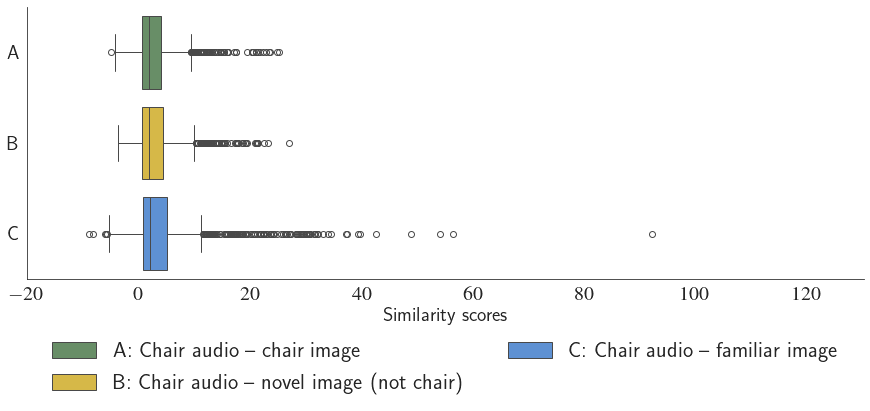

In [12]:
fig = plt.figure(figsize=(15, 5))
sns.set_style(style='white')
f = sns.boxplot(
    data=df, x="Similarity score", y="label", hue="label",
    # common_norm=False, 
    legend=True,
#     labels=['A', 'B', 'C', 'D'], 
#     linewidth=2.5, 
    palette=palette, 
#     log_scale=False,
)
handles, _ = f.get_legend_handles_labels()          # Get the artists.
f.legend(handles, 
         [r'A: Chair audio -- chair image', r'B: Chair audio -- novel image (not chair)', 
          r'C: Chair audio -- familiar image'], 
         loc="best")
# hatches = ["o", "+", "o", "+"]
# for i, patch in enumerate(f.patches):
#     patch.set_color('red')
#     patch.set_facecolor('black')
#     patch.set_fill(False)
#     patch.set_hatch(hatches[i])

# f.set(xticklabels=[])
f.set(ylabel=None)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Similarity scores', fontsize=20)
plt.xlim(-20, 130)
sns.move_legend(f, "lower center", ncol=2, bbox_to_anchor=(0.5, -0.5), title='', frameon=False, fontsize=22)
axes = plt.gca()
axes.spines[['top', 'right']].set_visible(False) 
plt.savefig(f'chair_box_plots{name}.pdf',bbox_inches='tight')